In [2]:
import numpy as np 
import pandas as pd

In [10]:
x = [1, 2, 3]
y = [4, 5, 6]
print(x + y)
print(3 * x)
type(x)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 1, 2, 3, 1, 2, 3]


list

In [11]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(x + y)
print(3 * x)
type(x)

[5 7 9]
[3 6 9]


numpy.ndarray

In [16]:
x = np.arange(10**7)
x[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
%%timeit 
sum(x)

2.3 s ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit
np.sum(x)

6.86 µs ± 204 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Мэджики для петухона: https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [82]:
%%timeit -n50 
"-".join(str(n) for n in range(100))

36.4 µs ± 8.72 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [41]:
import timeit
timeit.timeit('"-".join(str(n) for n in range(100))', number=10000)

0.3401553569999578

In [24]:
X = np.random.binomial(100, 0.5, size=(3,3))
X

array([[58, 45, 48],
       [55, 47, 49],
       [50, 50, 46]])

In [25]:
np.linalg.det(X)

-1103.9999999999989

In [26]:
Y = np.linalg.inv(X)
X@Y

array([[ 1.00000000e+00,  1.77635684e-15,  0.00000000e+00],
       [-8.32667268e-16,  1.00000000e+00, -4.44089210e-16],
       [-9.99200722e-16,  4.66293670e-15,  1.00000000e+00]])

In [ ]:
1e-15 # 1*10^{-15}

In [30]:
np.sum(np.abs(np.eye(3) - X@Y))

1.4488410471358293e-14

In [35]:
0.4 - 0.2

0.2

In [32]:
0.4 - 0.2 == 0.2

True

In [37]:
0.4 - 0.1

0.30000000000000004

In [38]:
0.4 - 0.1 == 0.3

False

In [40]:
x = 0.4 - 0.1 
np.abs(x - 0.3) < 1e-10

True

__Задача:__ 

- https://rusvectores.org/ru/calculator/#
- матрица $X$ 
- вектор $v$ 
- найти в матрице $X$ строку, которая ближе всего к $v$ 

In [57]:
X = np.random.binomial(100, 0.5, size=(5,3))/100
v = np.random.uniform(size=(5,1))
X, v

(array([[0.55, 0.51, 0.36],
        [0.49, 0.53, 0.57],
        [0.5 , 0.48, 0.6 ],
        [0.51, 0.43, 0.51],
        [0.48, 0.47, 0.44]]),
 array([[0.85153175],
        [0.41805445],
        [0.66153326],
        [0.25725291],
        [0.20440316]]))

$$
||x|| = \sqrt{\sum_{i=1}^n x^2_i}
$$

In [63]:
R = (X - v)**2
R

array([[0.0909214 , 0.11664394, 0.24160346],
       [0.00517616, 0.01253181, 0.02308745],
       [0.02609299, 0.03295432, 0.00378634],
       [0.06388109, 0.02984156, 0.06388109],
       [0.07595362, 0.07054168, 0.05550587]])

In [67]:
z = np.sqrt(np.sum(R, axis=0))
z

array([0.51188403, 0.51236052, 0.62278746])

In [79]:
X[:, np.where(z == np.min(z)) ].T

array([[[0.55, 0.49, 0.5 , 0.51, 0.48]]])

__Задача__ 

- Отнормировать столбцы к отрузку [0;1] 


Петя весит 50 кг, 1 м
Вася весит 75 кг, 1.5 м

In [91]:
print( (50 - 75)**2 )
print( (1 - 1.5)**2 )
(50 - 75)**2 + (1 - 1.5)**2

625
0.25


625.25

In [ ]:
# Нормировка на [0; 1]

x                   [a, b]
x - a               [0, b-a]
(x - a)/(b - a)     [0, 1]

In [101]:
X = np.array([[50, 1],[75,1.5], [25, 1.25]])
X_scalar = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))
X_scalar

array([[0.5, 0. ],
       [1. , 1. ],
       [0. , 0.5]])

In [106]:
w = np.array([2,2])
X_scalar*w

array([[1., 0.],
       [2., 2.],
       [0., 1.]])

In [108]:
X_scalar.shape

(3, 2)

In [114]:
X = np.zeros((2,3,2,2))
X

array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]])

In [118]:
X_scalar[:,:,None].shape

(3, 2, 1)

In [117]:
X_scalar[:,None,:].shape

(3, 1, 2)

In [119]:
X_scalar[None,...].shape

(1, 3, 2)

In [126]:
X_scalar[:,None,:] - X_scalar

array([[[ 0. ,  0. ],
        [-0.5, -1. ],
        [ 0.5, -0.5]],

       [[ 0.5,  1. ],
        [ 0. ,  0. ],
        [ 1. ,  0.5]],

       [[-0.5,  0.5],
        [-1. , -0.5],
        [ 0. ,  0. ]]])

In [123]:
X_scalar

array([[0.5, 0. ],
       [1. , 1. ],
       [0. , 0.5]])

### Про джойны

Таблица - совокупность из матрицы, названий строк (индексы), названий колонок 

In [155]:
X = np.arange(15)
X.resize((5,3))
df = pd.DataFrame(X)
df.columns = ['a', 'b', 'c']
df.index = ['z', 'y', 'x', 'x', 'v']
df

,a,b,c
z,0,1,2
y,3,4,5
x,6,7,8
x,9,10,11
v,12,13,14


In [156]:
df.values

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [157]:
df.index.values

array(['z', 'y', 'x', 'x', 'v'], dtype=object)

In [158]:
df.columns.values

array(['a', 'b', 'c'], dtype=object)

In [161]:
dg = pd.DataFrame({'d': [5,5,6], 'e': [4,6,6]})
dg.index = ['x','u','x']
dg

,d,e
x,5,4
u,5,6
x,6,6


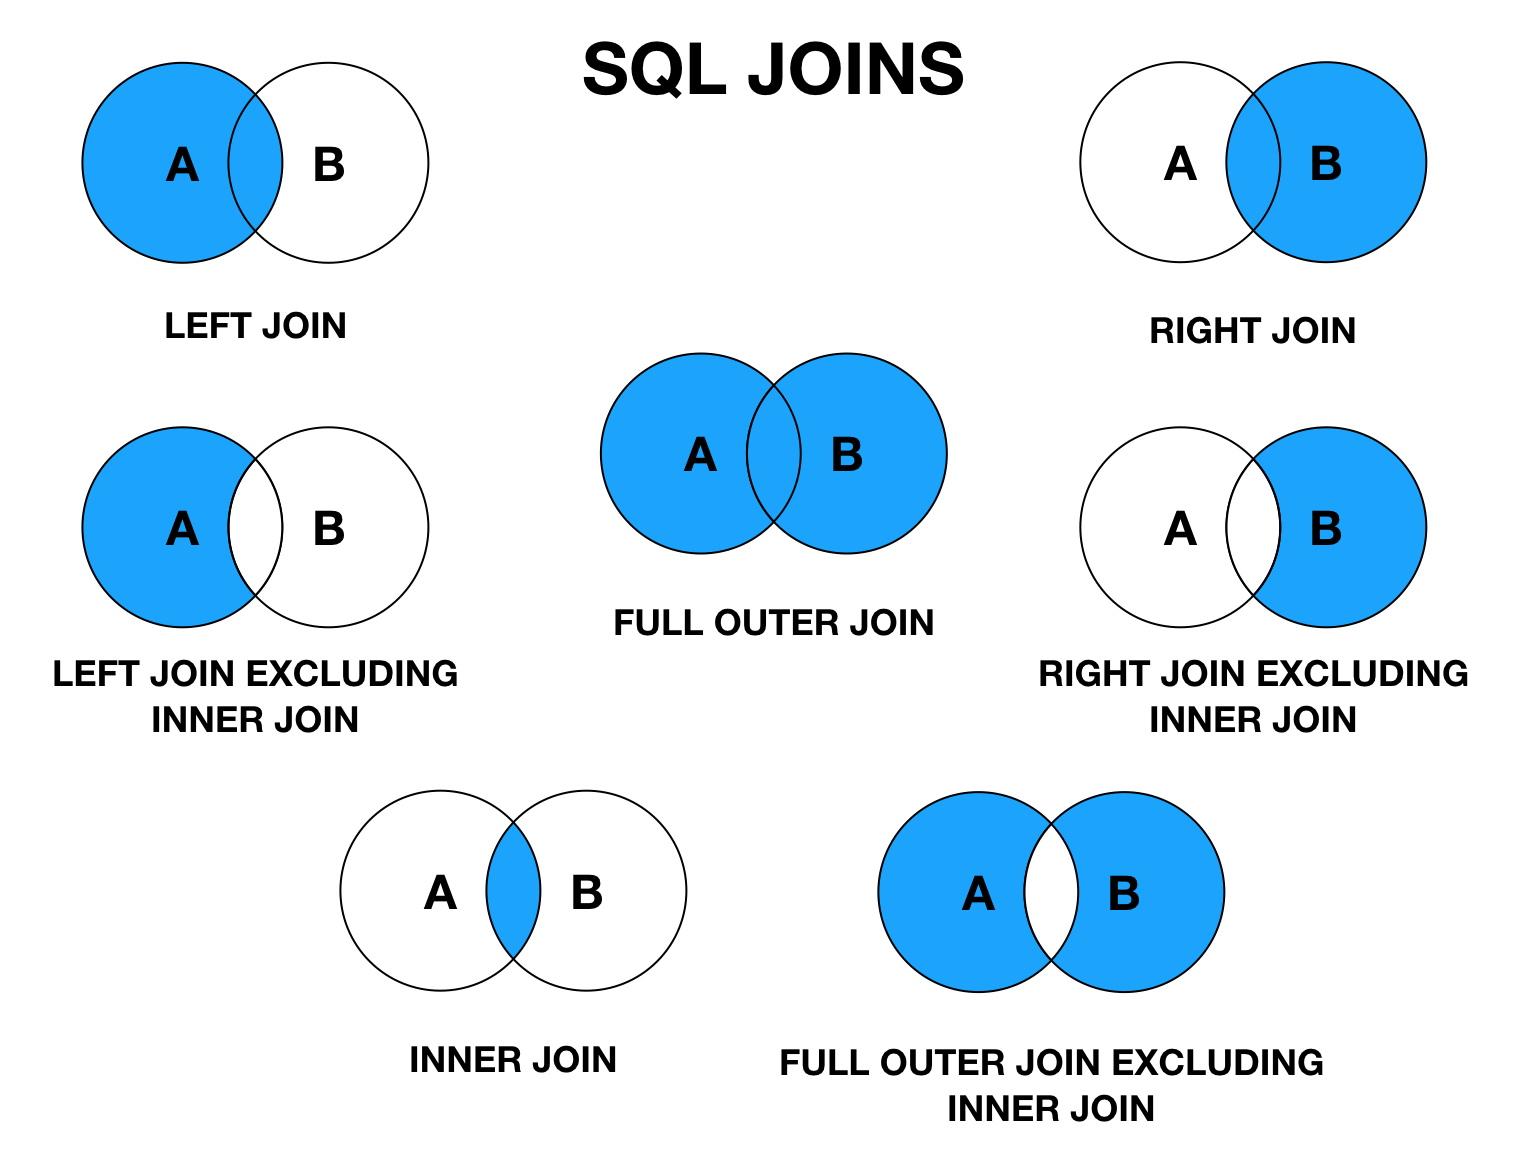

A = {1,2}
B = {3,4,5}
A x B = {(1,3),(1,4),(1,5), (2,3), ...}

In [162]:
# Если индексы встречаются одинаковые, 
# он будет искать декартово произведение
df.join(dg) # left join

,a,b,c,d,e
v,12,13,14,NaN,NaN
x,6,7,8,5.0,4.0
x,6,7,8,6.0,6.0
x,9,10,11,5.0,4.0
x,9,10,11,6.0,6.0
y,3,4,5,NaN,NaN
z,0,1,2,NaN,NaN


In [152]:
df.join(dg, how='right') # right join

,a,b,c,d,e
x,6.0,7.0,8.0,5,4
u,NaN,NaN,NaN,5,6


In [153]:
df.join(dg, how='inner')

,a,b,c,d,e
x,6,7,8,5,4


In [154]:
df.join(dg, how='outer')

,a,b,c,d,e
u,NaN,NaN,NaN,5.0,6.0
v,12.0,13.0,14.0,NaN,NaN
w,9.0,10.0,11.0,NaN,NaN
x,6.0,7.0,8.0,5.0,4.0
y,3.0,4.0,5.0,NaN,NaN
z,0.0,1.0,2.0,NaN,NaN
